In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes
import seaborn as sns
sns.set_style('whitegrid')
import networkx as nx
from node2vec import Node2Vec
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import warnings


In [32]:
df = pd.read_csv('dataset-dpr-new.csv')
df.head()

,nama_dpr,nama_partai,nama_provinsi
0,Nizar Dahlan,Partai Bulan Bintang,Bengkulu
1,Hidayat Nur Wahid,Partai Amanat Nasional,Jawa Tengah
2,Hidayat Nur Wahid,Partai Keadilan Sejahtera,Jawa Tengah
3,Suswono,Partai Keadilan Sejahtera,Jawa Tengah
4,Laode Masihu Kamaluddin,Partai Persatuan Pembangunan,Jawa Tengah


In [33]:
g = nx.from_pandas_edgelist(df, source='nama_dpr', target='nama_partai')

In [34]:
df2=df[['nama_dpr','nama_provinsi']].dropna(axis = 0, how ='any')
df2.head()

,nama_dpr,nama_provinsi
0,Nizar Dahlan,Bengkulu
1,Hidayat Nur Wahid,Jawa Tengah
2,Hidayat Nur Wahid,Jawa Tengah
3,Suswono,Jawa Tengah
4,Laode Masihu Kamaluddin,Jawa Tengah


In [35]:
mylist = df2.values.tolist()
mylist

[['Nizar Dahlan', 'Bengkulu'],
 ['Hidayat Nur Wahid', 'Jawa Tengah'],
 ['Hidayat Nur Wahid', 'Jawa Tengah'],
 ['Suswono', 'Jawa Tengah'],
 ['Laode Masihu Kamaluddin', 'Jawa Tengah'],
 ['Marwoto Mintohardjono', 'Jawa Tengah'],
 ['Laode Masihu Kamaluddin', 'Jawa Timur'],
 ['Muhaimin Iskandar', 'Jawa Timur'],
 ['Adjie Massaid', 'Daerah Khusus Ibukota Jakarta'],
 ['Angelina Sondakh', 'Sulawesi Utara'],
 ['Adrian Tapada', 'Sulawesi Utara'],
 ['Panda Nababan', 'Sumatera Utara'],
 ['Taufiq Kiemas', 'Sumatera Selatan'],
 ['Dede Yusuf', 'Jawa Barat'],
 ['Dede Yusuf', 'Jawa Barat'],
 ['Angelina Sondakh', 'Jawa Barat'],
 ['Daday Hudaya', 'Jawa Barat'],
 ['Ahmad Kurdi Moekri', 'Jawa Barat'],
 ['Laode Masihu Kamaluddin', 'Jawa Barat'],
 ['Marwoto Mintohardjono', 'Jawa Barat'],
 ['Helmy Faishal Zaini', 'Jawa Barat'],
 ['Suharso Monoarfa', 'Nusa Tenggara Barat'],
 ['Taufiq Kiemas', 'Sumatera Barat'],
 ['Irwan Prayitno', 'Sumatera Barat'],
 ['Asman Abnur', 'Sumatera Barat'],
 ['Nizar Dahlan', 'Sumater

In [36]:
g.add_edges_from(mylist, weight=1, label="provinsi")

In [37]:
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
labels

{'Nizar Dahlan': 'Nizar Dahlan',
 'Partai Bulan Bintang': 'Partai Bulan Bintang',
 'Hidayat Nur Wahid': 'Hidayat Nur Wahid',
 'Partai Amanat Nasional': 'Partai Amanat Nasional',
 'Partai Keadilan Sejahtera': 'Partai Keadilan Sejahtera',
 'Suswono': 'Suswono',
 'Laode Masihu Kamaluddin': 'Laode Masihu Kamaluddin',
 'Partai Persatuan Pembangunan': 'Partai Persatuan Pembangunan',
 'Marwoto Mintohardjono': 'Marwoto Mintohardjono',
 'Muhaimin Iskandar': 'Muhaimin Iskandar',
 'Partai Kebangkitan Bangsa': 'Partai Kebangkitan Bangsa',
 'Adjie Massaid': 'Adjie Massaid',
 'Partai Demokrat': 'Partai Demokrat',
 'Angelina Sondakh': 'Angelina Sondakh',
 'Adrian Tapada': 'Adrian Tapada',
 'Partai Damai Sejahtera': 'Partai Damai Sejahtera',
 'Panda Nababan': 'Panda Nababan',
 'Partai Demokrasi Indonesia Perjuangan': 'Partai Demokrasi Indonesia Perjuangan',
 'Taufiq Kiemas': 'Taufiq Kiemas',
 'Dede Yusuf': 'Dede Yusuf',
 'Daday Hudaya': 'Daday Hudaya',
 'Ahmad Kurdi Moekri': 'Ahmad Kurdi Moekri',
 'He

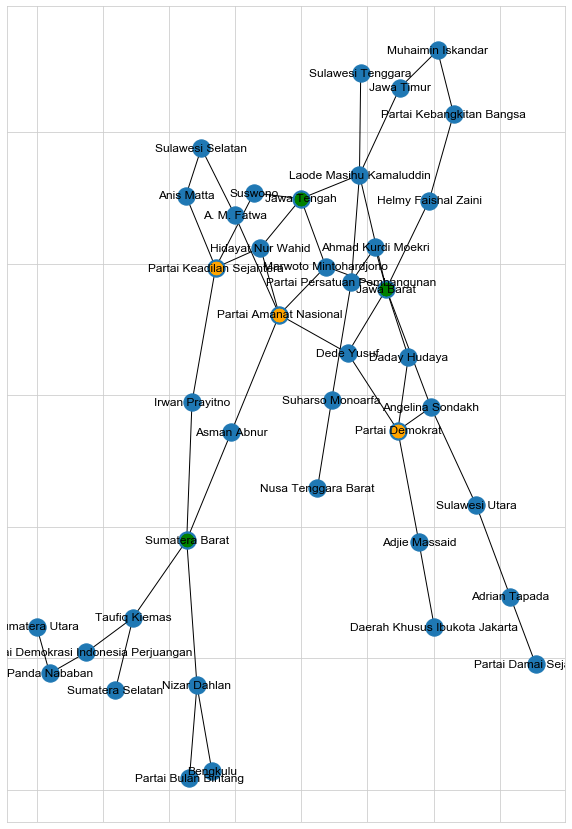

In [48]:
fig, ax = plt.subplots(figsize=(10,15))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels=True)
nx.draw_networkx_edges(g, layout, ax=ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)

partaiPopuler = [partai for partai in df.nama_partai if
g.degree(partai) > 3]
nx.draw_networkx_nodes(g, layout,
nodelist=partaiPopuler, node_color='orange',
node_size=150)

provinsiPopuler = [provinsi for provinsi in df.nama_provinsi if
g.degree(provinsi) > 3]
nx.draw_networkx_nodes(g, layout,
nodelist=provinsiPopuler, node_color='green',
node_size=150)


lima besar by closeness:
('Partai Amanat Nasional', 0.3046875)
('Dede Yusuf', 0.3046875)
('Marwoto Mintohardjono', 0.3)
('Jawa Barat', 0.3)
('Hidayat Nur Wahid', 0.2746478873239437)
('Laode Masihu Kamaluddin', 0.2708333333333333)
('Jawa Tengah', 0.2708333333333333)
('Asman Abnur', 0.2671232876712329)
('Partai Demokrat', 0.2565789473684211)
('Partai Keadilan Sejahtera', 0.2532467532467532)


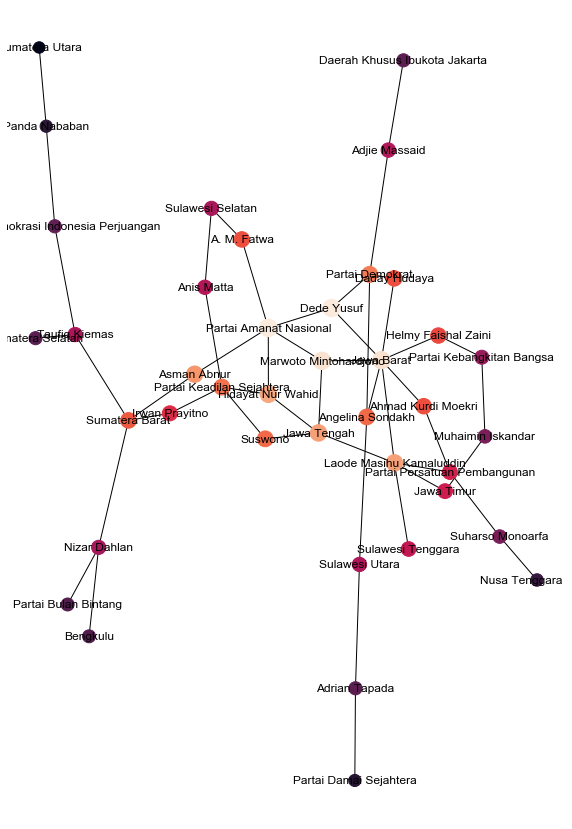

In [43]:
closeness_dict=nx.closeness_centrality(g)
nx.set_node_attributes(g, closeness_dict, 'closeness')
pos = nx.spring_layout(g)
node_color = [30000.0 * closeness_dict[v] for v in g]
node_size =  [v * 1000 for v in closeness_dict.values()]
plt.figure(figsize=(10,15))
nx.draw_networkx(g, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

import operator 
urutan_closeness = sorted(closeness_dict.items(), key=operator.itemgetter(1), 
reverse=True)
print("Sepuluh Teratas by closeness:")
for b in urutan_closeness[:10]:
    print(b)
